**Breast Cancer Wisconsin (Diagnóstico)**

Descripción: Contiene características calculadas a partir de una imagen digitalizada de un aspirado con aguja fina de una masa mamaria.


Clase a Predecir: El objetivo es predecir si el tumor es Maligno (M) o Benigno (B). Es un problema clásico de clasificación binaria.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    accuracy_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer

SEED = 42

np.random.seed(SEED)
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


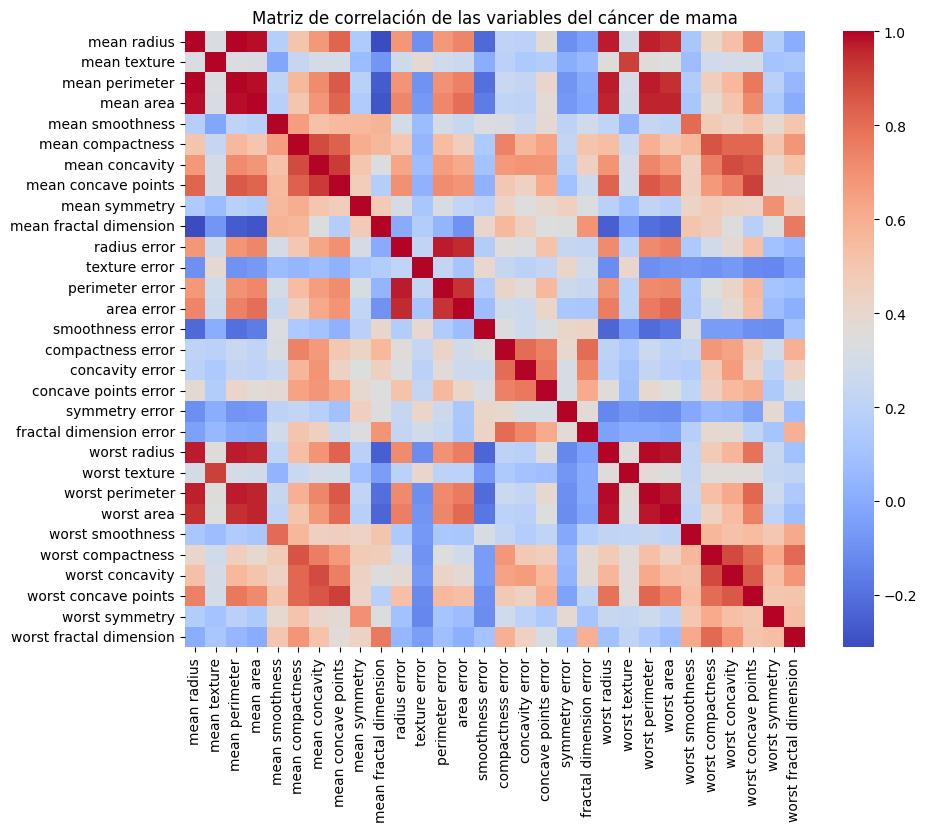

In [47]:
# dividir variables
x = df.drop('target', axis=1)
y = df['target']

# Visualizar correlación
plt.figure(figsize=(10, 8))
sns.heatmap(x.corr(), cmap='coolwarm')
plt.title('Matriz de correlación de las variables del cáncer de mama')
plt.show()

In [48]:
# Separa train/test y escalar
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [49]:
def evaluar_modelo(modelo, x_tr, y_tr, x_ts, y_ts):
    modelo.fit(x_tr, y_tr)
    pred = modelo.predict(x_ts)
    return accuracy_score(y_ts, pred)

resultados = {}

# Modelo Naive Bayes
nb_model = GaussianNB()
resultados['Naive Bayes'] = evaluar_modelo(nb_model, x_train, y_train, x_test, y_test)

# Modelo KNN
knn_model = KNeighborsClassifier()
resultados['KNN'] = evaluar_modelo(knn_model, x_train, y_train, x_test, y_test)

# Modelo Regresión Logística
lg_model = LogisticRegression()
resultados['Regresión Logística'] = evaluar_modelo(lg_model, x_train, y_train, x_test, y_test)

# Modelo Árbol de decisiones
tree_model = DecisionTreeClassifier()
resultados['Árbol de decisiones'] = evaluar_modelo(tree_model, x_train, y_train, x_test, y_test)

# Mostrar resultados
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Modelo', 'Precisión'])
df_resultados = df_resultados.sort_values(by='Precisión', ascending=False)
print(df_resultados)


                Modelo  Precisión
2  Regresión Logística   0.982456
1                  KNN   0.959064
3  Árbol de decisiones   0.941520
0          Naive Bayes   0.935673


Modelo a Elegir: Regresión Logística

In [50]:
print("Información del dataset:")
print(df.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  s

In [51]:
print("Verificar valores nulos:")
print(df.isnull().sum())

Verificar valores nulos:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [52]:
print(f"Distribución de clases: {np.bincount(y)}")


Distribución de clases: [212 357]


In [53]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=SEED,
    stratify=y
)

print(f"Entrenamiento: {x_train.shape[0]}")
print(f"Prueba: {x_test.shape[0]}")

# Escalamiento
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Entrenamiento: 398
Prueba: 171


In [54]:
logreg = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=SEED
)

logreg.fit(x_train_scaled, y_train)

y_pred = logreg.predict(x_test_scaled)
y_proba = logreg.predict_proba(x_test_scaled)[:, 1]

# Matriz de confusión, para evaluar nuestro modelo (predicción vs valores reales)
print("[VN FP] - verdaderos negativos y falsos positivos")
print("[FN VP] - Falsos negativos y verdaderos positivos")

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Maligno', 'Benigno']))

auc = roc_auc_score(y_test, y_proba)
print(f"\nAUC: {auc}")

[VN FP] - verdaderos negativos y falsos positivos
[FN VP] - Falsos negativos y verdaderos positivos
[[ 63   1]
 [  1 106]]

Reporte de clasificación:
              precision    recall  f1-score   support

     Maligno       0.98      0.98      0.98        64
     Benigno       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


AUC: 0.9981016355140186


AUC > 0.9 => Excelente

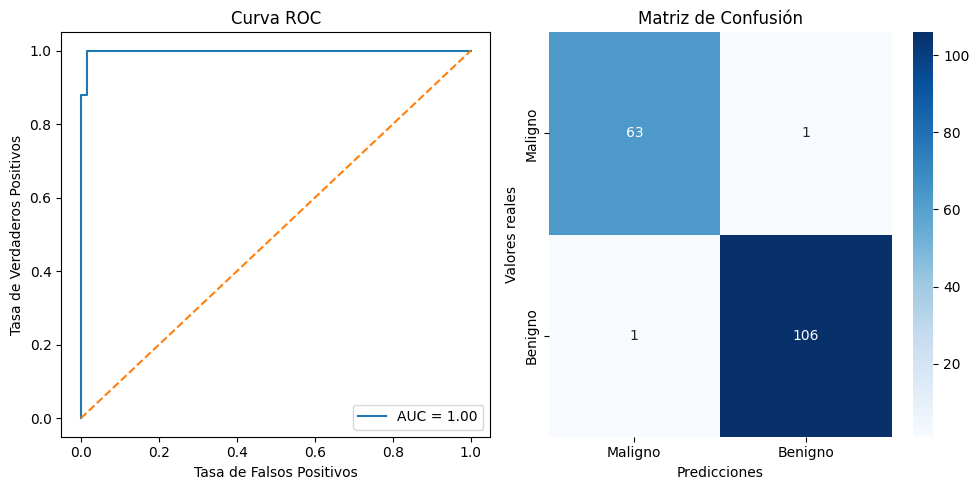

In [55]:
# Visualización

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
axes[0].plot(fpr, tpr, label=f'AUC = {auc:.2f}')
axes[0].plot([0, 1], [0, 1], linestyle='--')
axes[0].set_xlabel('Tasa de Falsos Positivos')
axes[0].set_ylabel('Tasa de Verdaderos Positivos')
axes[0].set_title('Curva ROC')
axes[0].legend()

matriz_conf = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
axes[1].set_title('Matriz de Confusión')
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores reales')

plt.tight_layout()
plt.show()

- 2 errores en total (1 FP y 1 FN)
- El modelo clasifica el 99% de los casos.